In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.svm import LinearSVC, SVC, LinearSVR, SVR

%matplotlib inline

In [2]:
iris = datasets.load_iris()
X_iris = iris["data"][:, (2, 3)] # petal length and width
y_iris = (iris["target"] == 2).astype(np.float64)

# Start with SVMs

In [3]:
svm_clf = Pipeline((
    ("scaler", StandardScaler()),
    ("linear_svc", LinearSVC(C=1, loss='hinge'))
))
svm_clf.fit(X_iris,y_iris)

Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('linear_svc', LinearSVC(C=1, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='hinge', max_iter=1000, multi_class='ovr',
     penalty='l2', random_state=None, tol=0.0001, verbose=0))])

In [4]:
svm_clf.predict([[5.5, 1.7]])

array([ 1.])

# Nonlinear SVM classification

In [5]:
X_moons, y_moons = datasets.make_moons(n_samples=100, noise=0.3)

In [6]:
def plot_dataset(X, y, axes):
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs")
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^")
    plt.axis(axes)
    plt.grid(True, which='both')
    plt.xlabel(r"$x_1$", fontsize=20)
    plt.ylabel(r"$x_2$", fontsize=20, rotation=0)

def plot_predictions(clf, axes):
    x0s = np.linspace(axes[0], axes[1], 100)
    x1s = np.linspace(axes[2], axes[3], 100)
    x0, x1 = np.meshgrid(x0s, x1s)
    X = np.c_[x0.ravel(), x1.ravel()]
    y_pred = clf.predict(X).reshape(x0.shape)
    y_decision = clf.decision_function(X).reshape(x0.shape)
    plt.contourf(x0, x1, y_pred, cmap=plt.cm.brg, alpha=0.2)
    plt.contourf(x0, x1, y_decision, cmap=plt.cm.brg, alpha=0.1)

In [7]:
polynomial_svm_clf = Pipeline((
    ("polyfeatures", PolynomialFeatures(degree=3)),
    ("scaler", StandardScaler()),
    ("svm_clf", LinearSVC(C=5, loss='hinge'))
))
polynomial_svm_clf.fit(X_moons, y_moons)

Pipeline(memory=None,
     steps=[('polyfeatures', PolynomialFeatures(degree=3, include_bias=True, interaction_only=False)), ('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('svm_clf', LinearSVC(C=5, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='hinge', max_iter=1000, multi_class='ovr',
     penalty='l2', random_state=None, tol=0.0001, verbose=0))])

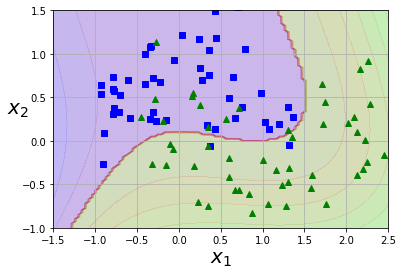

In [8]:
plot_predictions(polynomial_svm_clf, [-1.5, 2.5, -1, 1.5])
plot_dataset(X_moons, y_moons, [-1.5, 2.5, -1, 1.5])
plt.show()

# Polynomial Kernel

In [9]:
poly_kernel_svm_clf = Pipeline((
    ("scaler", StandardScaler()),
    ("svm_clf", SVC(kernel="poly", degree=10, coef0=0.75, C=5))
))
poly_kernel_svm_clf.fit(X_moons, y_moons)

Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('svm_clf', SVC(C=5, cache_size=200, class_weight=None, coef0=0.75,
  decision_function_shape='ovr', degree=10, gamma='auto', kernel='poly',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))])

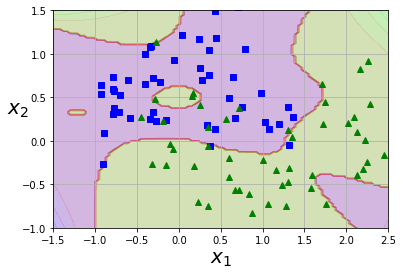

In [10]:
plot_predictions(poly_kernel_svm_clf, [-1.5, 2.5, -1, 1.5])
plot_dataset(X_moons, y_moons, [-1.5, 2.5, -1, 1.5])
plt.show()

# Gaussian RBF Kernel

In [11]:
rbf_kernel_svm_clf = Pipeline((
    ("scaler", StandardScaler()),
    ("svm_clf", SVC(kernel="rbf", gamma=5, C=0.001))
))
rbf_kernel_svm_clf.fit(X_moons, y_moons)

Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('svm_clf', SVC(C=0.001, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=5, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))])

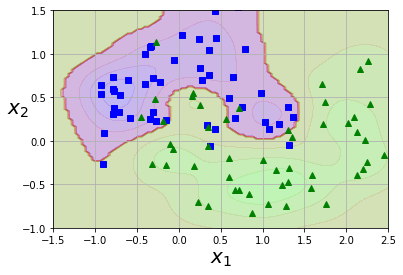

In [12]:
plot_predictions(rbf_kernel_svm_clf, [-1.5, 2.5, -1, 1.5])
plot_dataset(X_moons, y_moons, [-1.5, 2.5, -1, 1.5])
plt.show()

#  SVM Linear Regression

In [13]:
m = 50
X_reg = 2 * np.random.rand(m, 1)
y_reg = (4 + 3 * X_reg + np.random.randn(m, 1)).ravel()

In [14]:
def find_support_vectors(svm_reg, X, y, ep):
    y_pred = svm_reg.predict(X)
    off_margin = (np.abs(y - y_pred) >= ep)
    return np.argwhere(off_margin)


def plot_svm_regression(svm_reg, X, y, ep, axes):
    x1s = np.linspace(axes[0], axes[1], 100).reshape(100, 1)
    y_pred = svm_reg.predict(x1s)
    plt.plot(x1s, y_pred, "k-", linewidth=2, label=r"$\hat{y}$")
    plt.plot(x1s, y_pred + ep, "k--")
    plt.plot(x1s, y_pred - ep, "k--")
    plt.scatter(X[svm_reg.support_], y[svm_reg.support_], s=180, facecolors='#FFAAAA')
    plt.plot(X, y, "bo")
    plt.xlabel(r"$x_1$", fontsize=18)
    plt.legend(loc="upper left", fontsize=18)
    plt.axis(axes)

In [15]:
epsilon = 1.5
svm_reg = Pipeline((
    ("scaler", StandardScaler()),
    ("linear_svr", LinearSVR(epsilon=epsilon))
))
svm_reg.fit(X_reg, y_reg)

Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('linear_svr', LinearSVR(C=1.0, dual=True, epsilon=1.5, fit_intercept=True,
     intercept_scaling=1.0, loss='epsilon_insensitive', max_iter=1000,
     random_state=None, tol=0.0001, verbose=0))])

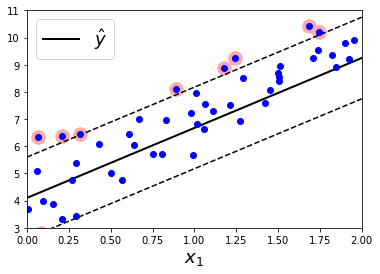

In [16]:
svm_reg.support_ = find_support_vectors(svm_reg, X_reg, y_reg, epsilon)
plot_svm_regression(svm_reg, X_reg, y_reg, epsilon, [0, 2, 3, 11])
plt.show()

# SVM Nonlinear Regression

In [17]:
m_nonlin = 100
X_nonlin = 2 * np.random.rand(m_nonlin, 1) - 1
y_nonlin = (0.2 + 0.1 * X_nonlin + 0.5 * X_nonlin**2 + np.random.randn(m_nonlin, 1)/10).ravel()

In [18]:
epsilon_nonlin = 0.1
svm_nonlin = Pipeline((
    ("scaler", StandardScaler()),
    ("svr", SVR(kernel="poly", degree=2, C=1, epsilon=epsilon_nonlin))
))
svm_nonlin.fit(X_nonlin, y_nonlin)

Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('svr', SVR(C=1, cache_size=200, coef0=0.0, degree=2, epsilon=0.1, gamma='auto',
  kernel='poly', max_iter=-1, shrinking=True, tol=0.001, verbose=False))])

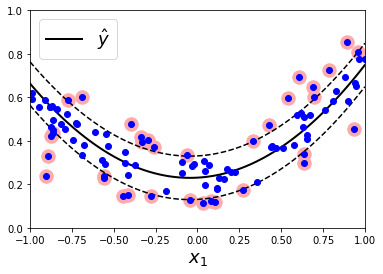

In [19]:
svm_nonlin.support_ = find_support_vectors(svm_nonlin, X_nonlin, y_nonlin, epsilon_nonlin)
plot_svm_regression(svm_nonlin, X_nonlin, y_nonlin, epsilon_nonlin, [-1, 1, 0, 1])
plt.show()